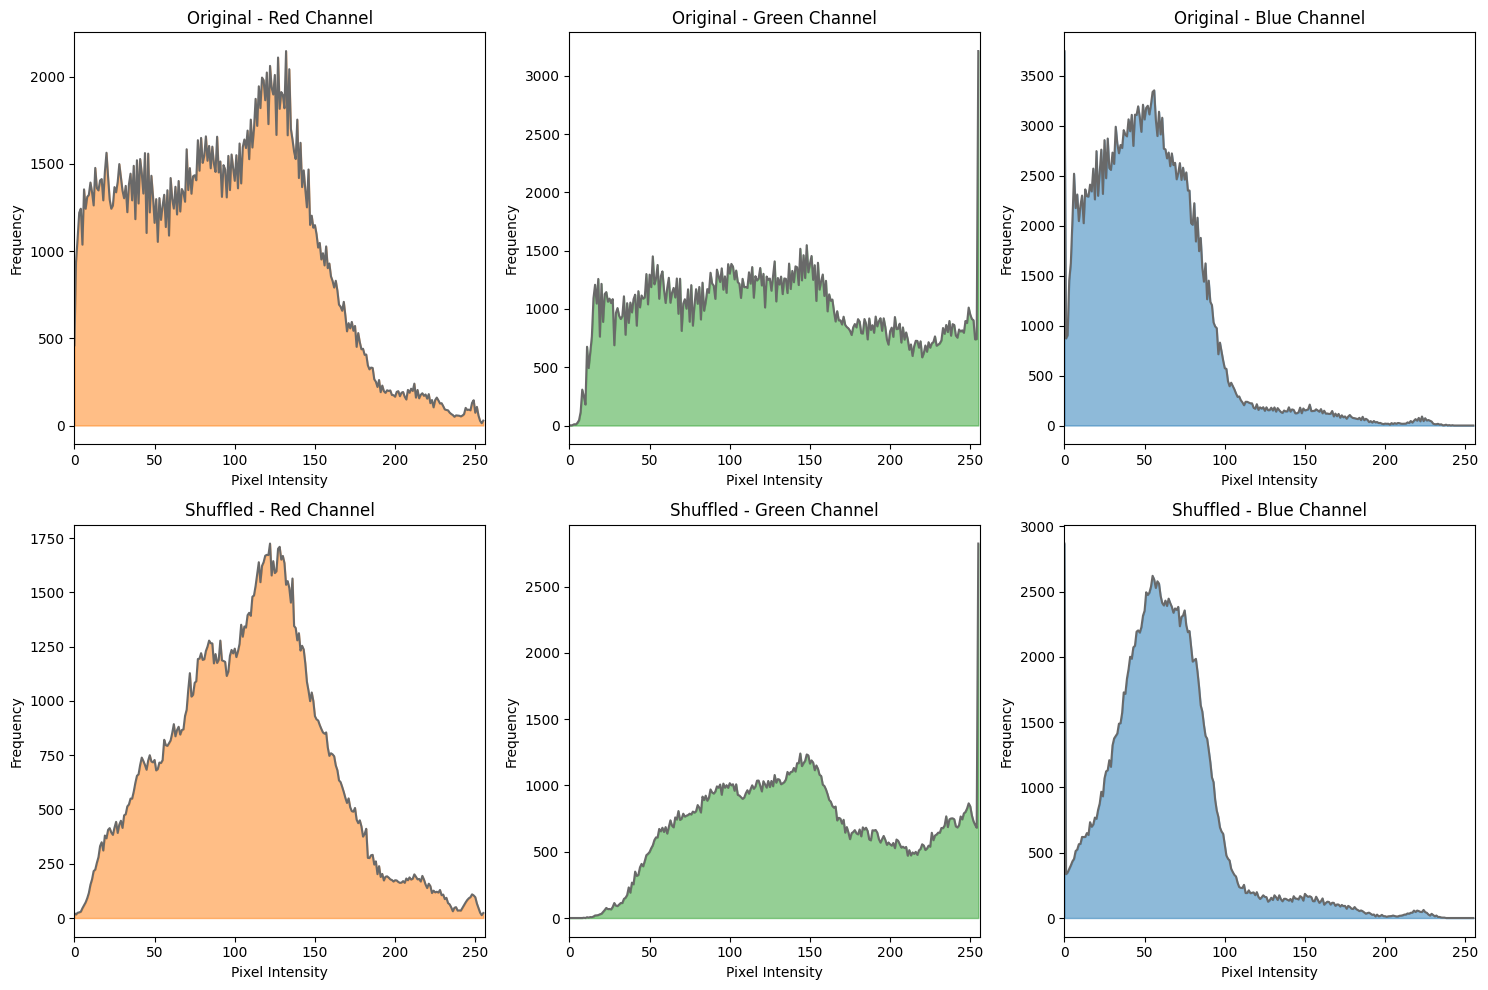

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate histogram for a single color component
def plot_color_histogram(ax, image, color, title):
    histogram = cv2.calcHist([image], [color], None, [256], [0, 256])
    ax.plot(histogram, color='dimgrey')#lightslategrey
    ax.fill_between(np.arange(256), histogram.flatten(), color=f'C{color}', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.set_xlim([0, 256])


# Read the original and shuffled images
original_image = cv2.imread('original_image.jpg')
shuffled_image = cv2.imread('shuffled_image.jpg')

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms for each color component of the original image
plot_color_histogram(axs[0, 0], original_image, 1, 'Original - Red Channel')
plot_color_histogram(axs[0, 1], original_image, 2, 'Original - Green Channel')
plot_color_histogram(axs[0, 2], original_image, 0, 'Original - Blue Channel')

# Plot histograms for each color component of the shuffled image
plot_color_histogram(axs[1, 0], shuffled_image, 1, 'Shuffled - Red Channel')
plot_color_histogram(axs[1, 1], shuffled_image, 2, 'Shuffled - Green Channel')
plot_color_histogram(axs[1, 2], shuffled_image, 0, 'Shuffled - Blue Channel')

# Adjust layout
plt.tight_layout()
plt.show()


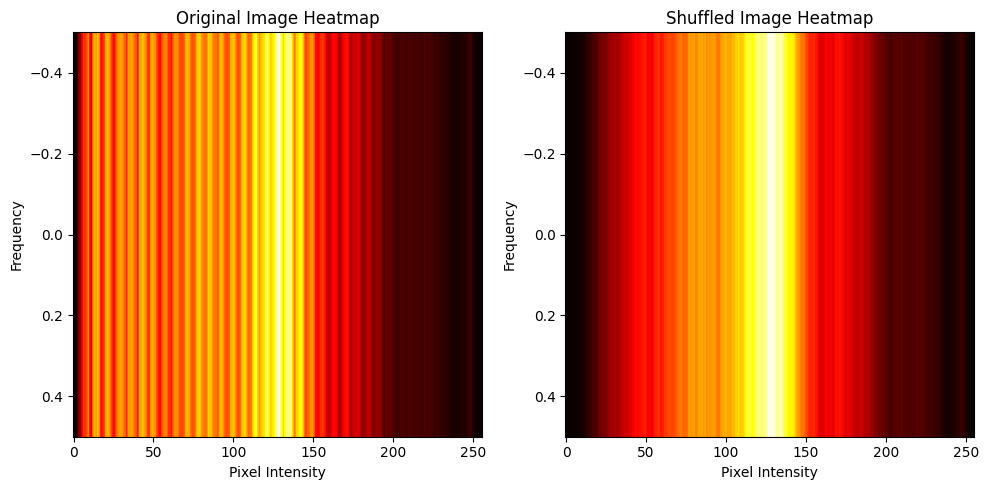

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate heatmap from histogram
def generate_heatmap(histogram):
    # Normalize histogram
    normalized_histogram = histogram / np.sum(histogram)
    # Reshape histogram to 2D array
    heatmap = normalized_histogram.reshape((1, -1))
    return heatmap

# Read original and shuffled images
original_image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)
shuffled_image = cv2.imread('shuffled_image.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate histograms
original_histogram = cv2.calcHist([original_image], [0], None, [256], [0, 256])
shuffled_histogram = cv2.calcHist([shuffled_image], [0], None, [256], [0, 256])

# Generate heatmaps
original_heatmap = generate_heatmap(original_histogram)
shuffled_heatmap = generate_heatmap(shuffled_histogram)

# Plot heatmaps
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_heatmap, cmap='hot', aspect='auto')
plt.title('Original Image Heatmap')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.imshow(shuffled_heatmap, cmap='hot', aspect='auto')
plt.title('Shuffled Image Heatmap')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


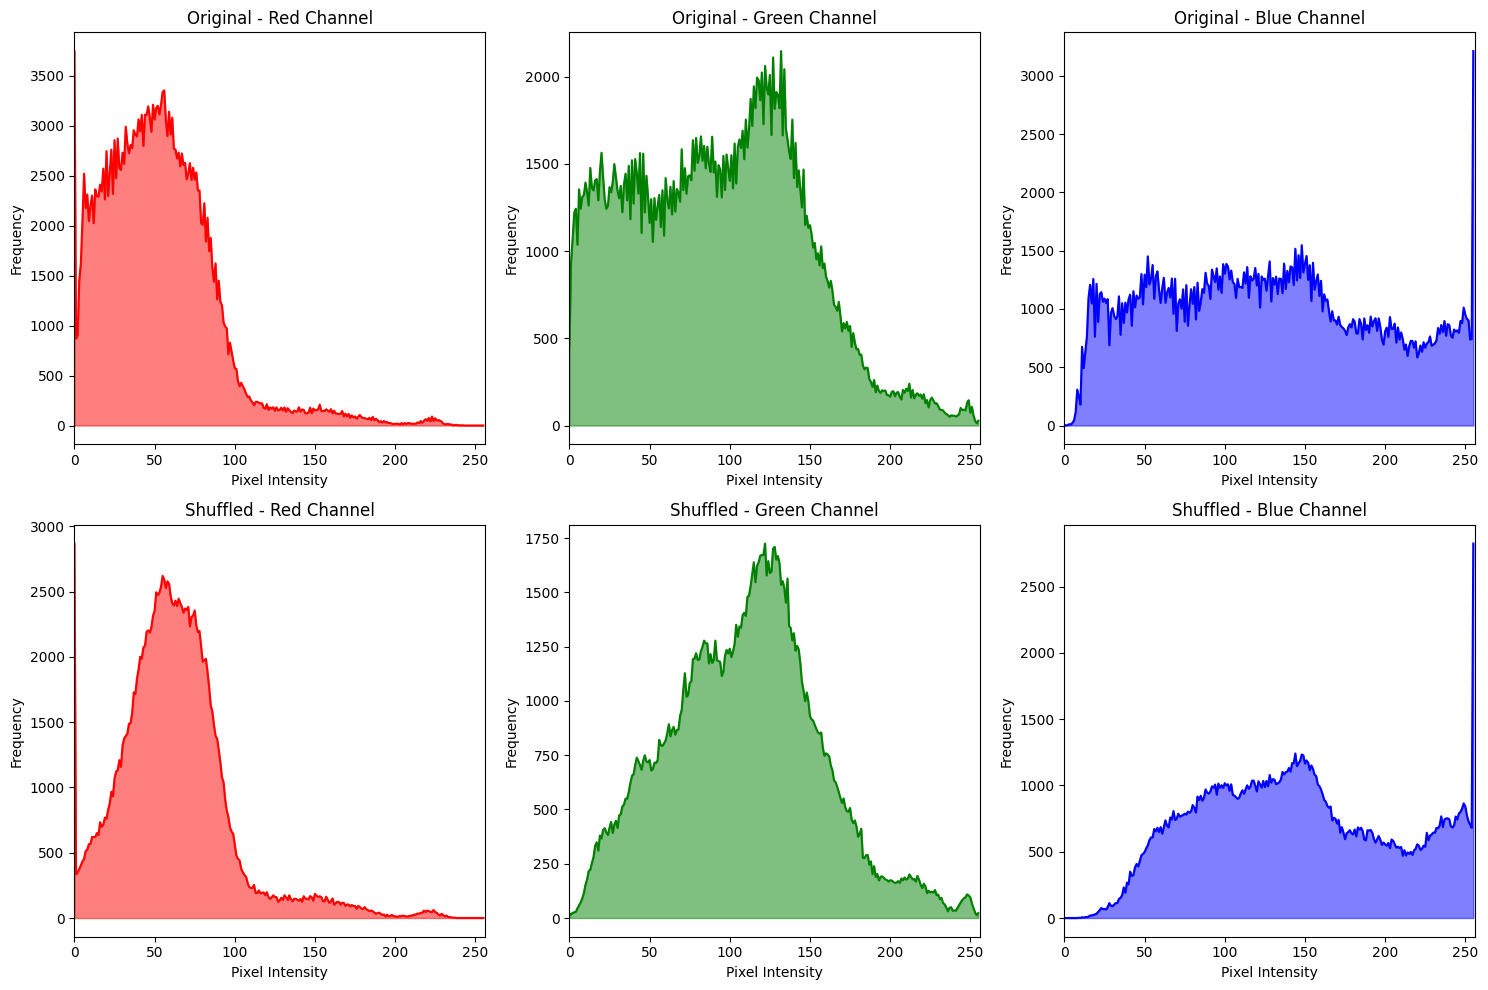

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate histogram for a single color component
def plot_color_histogram(ax, histogram, color, title):
    ax.plot(histogram, color=color)
    ax.fill_between(np.arange(256), histogram.flatten(), color=color, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.set_xlim([0, 256])

# Read original and shuffled images
original_image = cv2.imread('original_image.jpg')
shuffled_image = cv2.imread('shuffled_image.jpg')

# Calculate histograms for each color channel
original_hist_red = cv2.calcHist([original_image], [0], None, [256], [0, 256])
original_hist_green = cv2.calcHist([original_image], [1], None, [256], [0, 256])
original_hist_blue = cv2.calcHist([original_image], [2], None, [256], [0, 256])

shuffled_hist_red = cv2.calcHist([shuffled_image], [0], None, [256], [0, 256])
shuffled_hist_green = cv2.calcHist([shuffled_image], [1], None, [256], [0, 256])
shuffled_hist_blue = cv2.calcHist([shuffled_image], [2], None, [256], [0, 256])

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms for each color channel of the original image
plot_color_histogram(axs[0, 0], original_hist_red, 'r', 'Original - Red Channel')
plot_color_histogram(axs[0, 1], original_hist_green, 'g', 'Original - Green Channel')
plot_color_histogram(axs[0, 2], original_hist_blue, 'b', 'Original - Blue Channel')

# Plot histograms for each color channel of the shuffled image
plot_color_histogram(axs[1, 0], shuffled_hist_red, 'r', 'Shuffled - Red Channel')
plot_color_histogram(axs[1, 1], shuffled_hist_green, 'g', 'Shuffled - Green Channel')
plot_color_histogram(axs[1, 2], shuffled_hist_blue, 'b', 'Shuffled - Blue Channel')

# Adjust layout
plt.tight_layout()
plt.show()


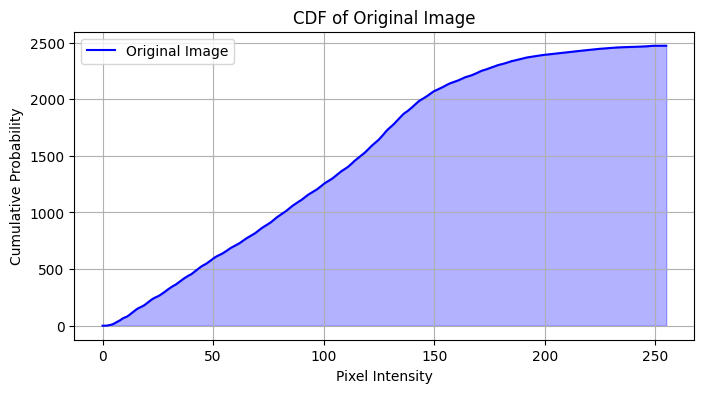

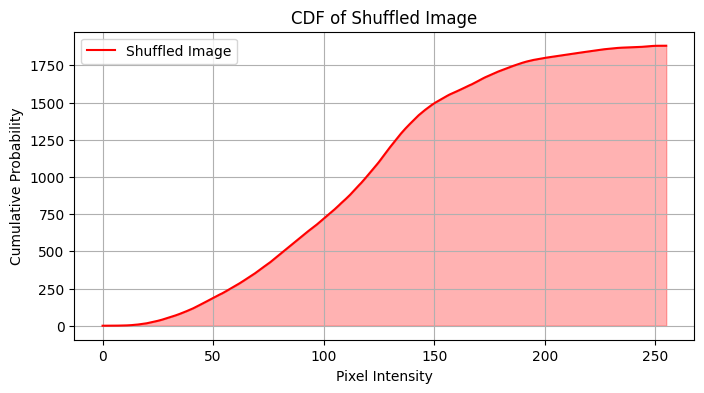

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the cumulative distribution function (CDF)
def calculate_cdf(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    return cdf_normalized

# Read original and shuffled images
original_image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)
shuffled_image = cv2.imread('shuffled_image.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate CDFs for original and shuffled images
cdf_original = calculate_cdf(original_image)
cdf_shuffled = calculate_cdf(shuffled_image)

# Plot CDF graphs for original image
plt.figure(figsize=(8, 4))
plt.plot(cdf_original, color='b', label='Original Image')
plt.fill_between(np.arange(256), cdf_original, color='b', alpha=0.3)
plt.title('CDF of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

# Plot CDF graphs for shuffled image
plt.figure(figsize=(8, 4))
plt.plot(cdf_shuffled, color='r', label='Shuffled Image')
plt.fill_between(np.arange(256), cdf_shuffled, color='r', alpha=0.3)
plt.title('CDF of Shuffled Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


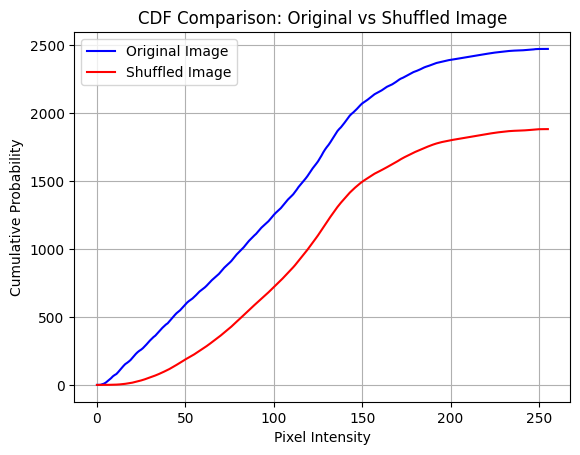

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the cumulative distribution function (CDF)
def calculate_cdf(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    return cdf_normalized

# Read original and reshuffled images
original_image = cv2.imread('original_image.jpg', cv2.IMREAD_GRAYSCALE)
shuffled_image = cv2.imread('shuffled_image.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate CDFs for original and reshuffled images
cdf_original = calculate_cdf(original_image)
cdf_reshuffled = calculate_cdf(shuffled_image)

# Plot CDF graphs
plt.plot(cdf_original, color='b', label='Original Image')
plt.plot(cdf_reshuffled, color='r', label='Shuffled Image')
plt.title('CDF Comparison: Original vs Shuffled Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()
